In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import shutil

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "./Dataset/Preprocessed"
# Define the number of classes in your dataset
num_classes = 5

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

X = []
y = []

for filename in os.listdir(data_dir):
    if filename.endswith(".npy"):
        # Load the preprocessed image from disk
        img = np.load(os.path.join(data_dir, filename))

        # Extract the label from the filename (assuming the label is the first part of the filename)
        try:
            label = int(filename.split("_")[0])
        except ValueError:
            print(f"Invalid filename: {filename}")
            continue

        # Augment the image using the data generator
        img = img.reshape((1,) + img.shape)
        for batch in datagen.flow(img, batch_size=1):
            augmented_img = batch[0]
            break

        # Append the preprocessed image and its label to the X and y lists
        X.append(augmented_img)
        y.append(label)


In [3]:
# Convert the X and y lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [4]:
# Convert the labels to one-hot encoding
y = np.eye(num_classes)[y]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

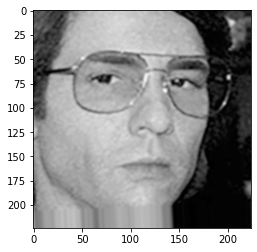

In [6]:
plt.imshow(X_test[30])

In [7]:
print(X_train.shape)
print(X_test.shape)

(244, 224, 224, 3)
(62, 224, 224, 3)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape of the images
input_shape = (224, 224, 3)

# Define the DeepFace model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [9]:
# Compile the model with an appropriate loss function and optimizer
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [10]:
history=model.fit(X_train, y_train,epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 1.7446 - accuracy: 0.2500 - val_loss: 1.5070 - val_accuracy: 0.3387
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 1.5473 - accuracy: 0.3074 - val_loss: 1.4164 - val_accuracy: 0.4355
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 1.3695 - accuracy: 0.4303 - val_loss: 1.3935 - val_accuracy: 0.4355
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 1.2471 - accuracy: 0.5574 - val_loss: 1.4009 - val_accuracy: 0.4032
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 1.0309 - accuracy: 0.6311 - val_loss: 0.9248 - val_accuracy: 0.6290
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.7618 - accuracy: 0.6967 - val_loss: 0.8622 - val_accuracy: 0.7581
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.6293 - accuracy: 0.7623 - val_loss: 0.7691 - val_accuracy: 0.6774
Epoch 8/15
8/8 [=========================

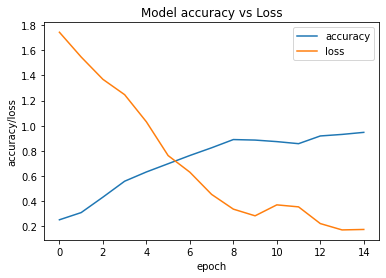

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model accuracy vs Loss")
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'],loc='best')
plt.show()

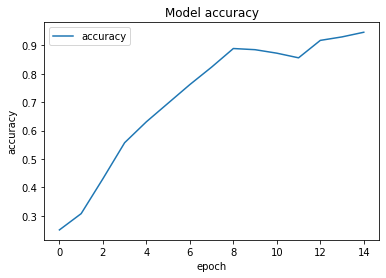

In [12]:
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'],loc='best')
plt.show()

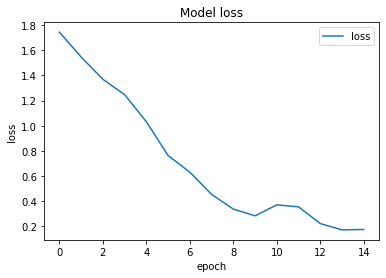

In [13]:
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='best')
plt.show()

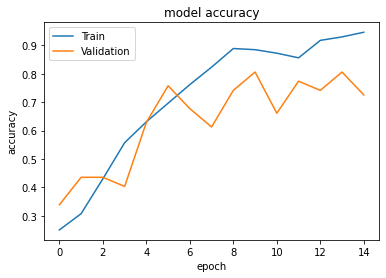

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

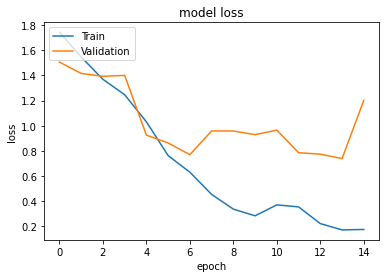

In [15]:
plt.plot (history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper left') 
plt.show()

In [16]:
class_names = ['Osama','Pablo',"Daud","Charles","ElChapo"]

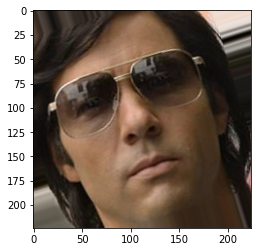

In [17]:
import random
n=random.randint(0,50)
plt.imshow(X_test[n])

In [18]:
prediction=model.predict(X_test)

2/2 [==============================] - 1s 194ms/step


In [19]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("Criminal detected: ",Pred_obj)

Criminal detected:  Charles


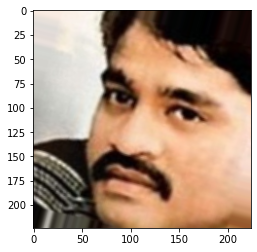

In [20]:
n=random.randint(0,61)
plt.imshow(X_test[n]
          )

In [22]:
Pred_obj=class_names[np.argmax(prediction[n])]
print("Criminal detected: ",Pred_obj)

Criminal detected:  Daud


In [22]:
prediction[n]

array([2.5982319e-09, 1.6546529e-04, 3.4384119e-08, 9.9965847e-01,
       1.7611438e-04], dtype=float32)

In [23]:
9.9999952e-01+3.2201032e-07+7.6572974e-08

0.999999918583294

In [24]:
prediction

array([[5.43240858e-23, 1.14855050e-14, 1.00000000e+00, 5.80634931e-17,
        3.84564306e-19],
       [1.39008935e-05, 4.50223265e-03, 5.56740415e-05, 9.90388691e-01,
        5.03956620e-03],
       [1.23672537e-03, 2.59932708e-02, 9.67045486e-01, 5.34519926e-03,
        3.79239849e-04],
       [4.91905148e-08, 1.99940419e-04, 9.94733572e-01, 4.17614309e-03,
        8.90347757e-04],
       [9.88094151e-01, 1.19055286e-02, 3.25981304e-08, 9.58534987e-11,
        3.94600107e-07],
       [3.98180187e-02, 1.08271308e-01, 1.37126842e-03, 3.32112223e-01,
        5.18427134e-01],
       [4.70013542e-11, 2.75662592e-06, 2.04285548e-08, 9.99997139e-01,
        6.71415208e-08],
       [4.36858409e-06, 7.14239432e-05, 6.31697569e-03, 9.90837753e-01,
        2.76940828e-03],
       [1.41012527e-12, 4.23213467e-03, 4.37839190e-05, 9.95720923e-01,
        3.20441359e-06],
       [3.41934385e-04, 3.53493959e-01, 4.01429310e-02, 2.55881339e-01,
        3.50139886e-01],
       [4.57185874e-16, 3.4693

In [23]:
model.save("deepfacemodelfinal.hdf5")

In [24]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 0s 185ms/step - loss: 1.2017 - accuracy: 0.7258
Test Loss: 1.201735258102417
Test Accuracy: 0.725806474685669


In [25]:
# Perform predictions on random test samples
n = np.random.randint(0, len(X_test))
sample_image = X_test[n]
sample_label = y_test[n]

1/1 [==============================] - 0s 31ms/step
True Label: 2
Predicted Label: 2
Predicted Class: Daud


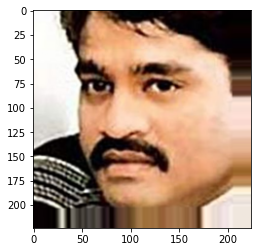

In [26]:
# Reshape the sample image for prediction
sample_image = np.expand_dims(sample_image, axis=0)

# Predict the class probabilities
predictions = model.predict(sample_image)[0]

# Get the predicted class label
predicted_label = np.argmax(predictions)

# Define the class names
class_names = ['Osama', 'Pablo', 'Daud', 'Charles', 'ElChapo']
plt.imshow(X_test[n])
# Print the results
print("True Label:", np.argmax(sample_label))
print("Predicted Label:", predicted_label)
print("Predicted Class:", class_names[predicted_label])

In [27]:
# Generate noisy test images
noisy_images = np.random.normal(loc=0, scale=0.1, size=X_test.shape)

# Add noise to the original test images
noisy_test_images = X_test + noisy_images

# Evaluate the model on noisy test images
noisy_test_loss, noisy_test_accuracy = model.evaluate(noisy_test_images, y_test)
print("Noisy Test Loss:", noisy_test_loss)
print("Noisy Test Accuracy:", noisy_test_accuracy)


2/2 [==============================] - 0s 210ms/step - loss: 3.2571 - accuracy: 0.7097
Noisy Test Loss: 3.257112503051758
Noisy Test Accuracy: 0.7096773982048035


In [28]:
# Apply different lighting conditions to test images
brightened_test_images = X_test + 0.2  # Increase brightness by 0.2
darkened_test_images = X_test - 0.2  # Decrease brightness by 0.2

# Evaluate the model on brightened test images
brightened_test_loss, brightened_test_accuracy = model.evaluate(brightened_test_images, y_test)
print("Brightened Test Loss:", brightened_test_loss)
print("Brightened Test Accuracy:", brightened_test_accuracy)

# Evaluate the model on darkened test images
darkened_test_loss, darkened_test_accuracy = model.evaluate(darkened_test_images, y_test)
print("Darkened Test Loss:", darkened_test_loss)
print("Darkened Test Accuracy:", darkened_test_accuracy)


2/2 [==============================] - 0s 228ms/step - loss: 1.0700 - accuracy: 0.6290
Brightened Test Loss: 1.0699853897094727
Brightened Test Accuracy: 0.6290322542190552
2/2 [==============================] - 0s 229ms/step - loss: 2.4029 - accuracy: 0.7258
Darkened Test Loss: 2.4028830528259277
Darkened Test Accuracy: 0.725806474685669


In [29]:
from sklearn.metrics import confusion_matrix

# Get the predictions of the model on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class indices
true_labels = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


2/2 [==============================] - 0s 210ms/step
Confusion Matrix:
[[ 5  1  0  0  0]
 [ 1  7  0  1  0]
 [ 0  1 19  0  1]
 [ 0  3  0 13  1]
 [ 0  5  1  2  1]]


2/2 [==============================] - 0s 218ms/step


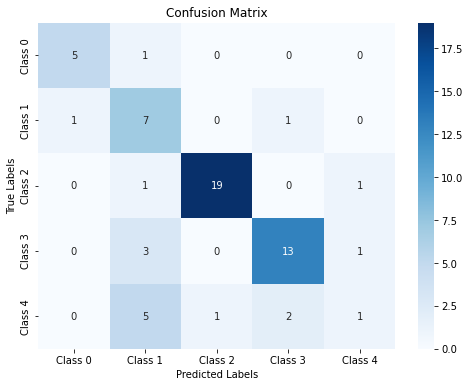

In [30]:
import seaborn as sns
# Get the predictions of the model on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
# Convert one-hot encoded labels to class indices
true_labels = np.argmax(y_test, axis=1)
# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names (replace with your own class names)
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
